<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/fipy2D_structuredGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh20x20.html

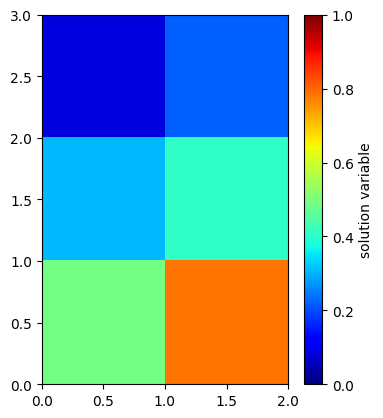

In [ ]:
from fipy import CellVariable,\
                 Grid2D,\
                 Viewer,\
                 TransientTerm,\
                 DiffusionTerm
from fipy.tools import numerix

nx = 2
ny = 3
dx = 1.
dy = dx
Lx = dx * nx
Ly = dy * ny
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

phi = CellVariable(name = "solution variable",
                   mesh = mesh,
                   value = 0.)

D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

valueTopLeft = 0
valueBottomRight = 1

X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > Ly / 2)) | (mesh.facesTop & (X < Lx / 2)))
facesBottomRight = ((mesh.facesRight & (Y < Ly / 2)) | (mesh.facesBottom & (X > Lx / 2)))

phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 1
from builtins import range

viewer = Viewer(vars=phi, datamin=0., datamax=1.)
for step in range(steps):
  eq.solve(var=phi,
            dt=timeStepDuration)
viewer.plot()